In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score, validation_curve, StratifiedShuffleSplit
from sklearn import metrics

In [ ]:
featuresMIC = pd.read_csv('featuresRankedMIC_550.csv')
featuresFC = pd.read_csv('featuresRankedFC_550.csv')
featuresRFC = pd.read_csv('featuresRankedRFC_550.csv')

# Mutual Information Gain

In [ ]:
X = featuresMIC.iloc[:,0:20]
y = featuresMIC['Playoffs']

In [ ]:
featuresMIC.iloc[:,0:20].head()

,ERA+,OPS+,RA/G,1Run,SV,R/G,BB_P,#a-tA-S,Under500,DefEff,PA,Rtot,H_P,SOS,WP,PAge,2B,BB,LOB,HR_P
0,0.173913,0.44,0.477612,0.559387,0.302094,0.339394,0.429180,0.45,0.402703,0.602041,0.594126,0.391473,0.622353,0.545455,0.687796,0.405941,0.151402,0.465585,0.695640,0.418914
1,0.637681,0.32,0.000000,0.390805,0.194577,0.133333,0.154861,0.65,0.389189,1.000000,0.356231,0.841085,0.181001,0.454545,0.262041,0.465347,0.191710,0.410213,0.400425,0.123964
2,0.231884,0.56,0.300995,0.641762,0.265422,0.363636,0.429180,0.75,0.385135,0.581633,0.523644,0.372093,0.464920,0.454545,0.221357,0.475248,0.361411,0.440077,0.555105,0.189573
3,0.275362,0.36,0.161692,0.618774,0.100396,0.000000,0.688073,0.40,0.271622,0.867347,0.279588,0.569767,0.159225,0.454545,0.435667,0.336634,0.078143,0.021753,0.387544,0.142855
4,0.594203,0.46,0.208955,0.392720,0.390013,0.442424,0.204570,0.60,0.528378,0.663265,0.566620,0.441860,0.482468,0.363636,0.218771,0.455446,0.242631,0.540521,0.517147,0.233241


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
KNNmetrics = ['manhattan','minkowski','euclidean']
n_neighbors = np.arange(1,30,2)

[0.78367449 0.76993909 0.76993909]


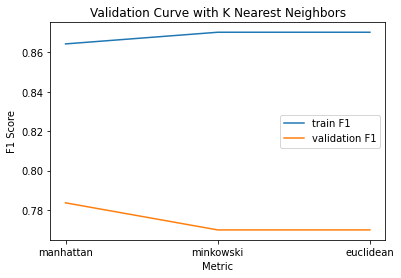

In [ ]:
train_scores, valid_scores = validation_curve(KNeighborsClassifier(), X_train, y_train, param_name="metric", param_range=KNNmetrics, scoring='f1', cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

print(valid_scores_mean)
plt.title("Validation Curve with K Nearest Neighbors")
plt.xlabel("Metric")
plt.ylabel("F1 Score")
plt.plot(KNNmetrics, train_scores_mean, label="train F1")
plt.plot(KNNmetrics, valid_scores_mean, label="validation F1")

plt.legend()
plt.show()

[0.71074244 0.76376035 0.78367449 0.79164172 0.7955126  0.79584306
 0.78670741 0.78646968 0.79677739 0.78956032 0.79561571 0.79143729
 0.80276471 0.7955169  0.78737018]


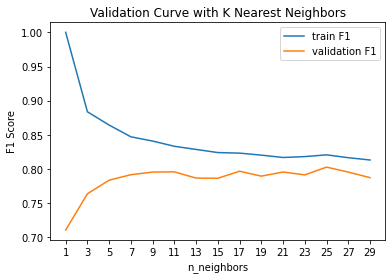

In [ ]:
train_scores, valid_scores = validation_curve(KNeighborsClassifier(metric='manhattan'), X_train, y_train, param_name="n_neighbors", param_range=n_neighbors, scoring='f1', cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

print(valid_scores_mean)
plt.title("Validation Curve with K Nearest Neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("F1 Score")
plt.xticks(np.arange(1,30,step=2))
plt.plot(n_neighbors, train_scores_mean, label="train F1")
plt.plot(n_neighbors, valid_scores_mean, label="validation F1")

plt.legend()
plt.show()

[0.07937231 0.03864267 0.07309271 0.04954025 0.06173995 0.04917792
 0.06431924 0.0629297  0.05366677 0.04045119 0.04225328 0.04931703
 0.05589523 0.06136702 0.06488849]


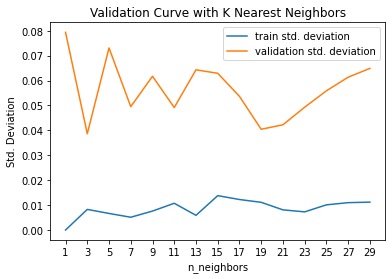

In [ ]:
train_scores, valid_scores = validation_curve(KNeighborsClassifier(metric='manhattan'), X_train, y_train, param_name="n_neighbors", param_range=n_neighbors, scoring='f1', cv=10)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

print(valid_scores_std)
plt.title("Validation Curve with K Nearest Neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Std. Deviation")
plt.xticks(np.arange(1,30,step=2))
plt.plot(n_neighbors, train_scores_std, label="train std. deviation")
plt.plot(n_neighbors, valid_scores_std, label="validation std. deviation")

plt.legend()
plt.show()

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=17, metric='manhattan')
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

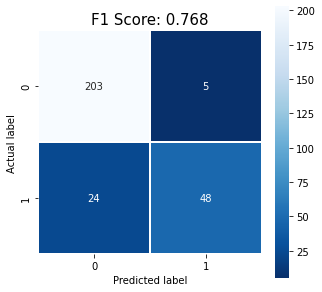

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'F1 Score: {0}'.format(round(f1_score(y_test, y_pred),3))
plt.title(all_sample_title, size = 15);

In [ ]:
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,"\n" "FP: ",fp,"\n" "TN: ", tn,"\n" "FN: ",fn)
print()
print(classification_report(y_test, y_pred))

TP:  48 
FP:  5 
TN:  203 
FN:  24

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       208
           1       0.91      0.67      0.77        72

    accuracy                           0.90       280
   macro avg       0.90      0.82      0.85       280
weighted avg       0.90      0.90      0.89       280



# ANOVA F-test

In [ ]:
X = featuresFC.iloc[:,0:20]
y = featuresFC['Playoffs']

In [ ]:
featuresFC.iloc[:,0:20].head()

,ERA+,OPS+,RA/G,R/G,1Run,SV,H_P,#a-tA-S,BB_P,BB,Rtot,DefEff,PA,Under500,HR,SF,E,IP,SOS,IBB_P
0,0.173913,0.44,0.477612,0.339394,0.559387,0.302094,0.622353,0.45,0.429180,0.465585,0.391473,0.602041,0.594126,0.402703,0.380797,0.358281,0.743973,0.678982,0.545455,0.495551
1,0.637681,0.32,0.000000,0.133333,0.390805,0.194577,0.181001,0.65,0.154861,0.410213,0.841085,1.000000,0.356231,0.389189,0.213898,0.398932,0.349282,0.697641,0.454545,0.471563
2,0.231884,0.56,0.300995,0.363636,0.641762,0.265422,0.464920,0.75,0.429180,0.440077,0.372093,0.581633,0.523644,0.385135,0.303797,0.538171,0.558574,0.710241,0.454545,0.441491
3,0.275362,0.36,0.161692,0.000000,0.618774,0.100396,0.159225,0.40,0.688073,0.021753,0.569767,0.867347,0.279588,0.271622,0.126699,0.124424,0.444482,0.680184,0.454545,0.477531
4,0.594203,0.46,0.208955,0.442424,0.392720,0.390013,0.482468,0.60,0.204570,0.540521,0.441860,0.663265,0.566620,0.528378,0.335165,0.443268,0.566802,0.752545,0.363636,0.501326


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

[0.76251307 0.75835737 0.75835737]


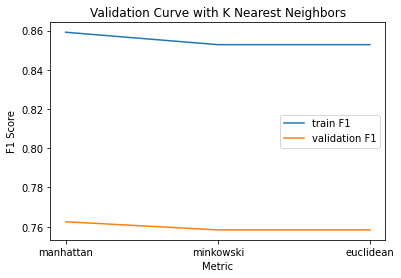

In [ ]:
train_scores, valid_scores = validation_curve(KNeighborsClassifier(), X_train, y_train, param_name="metric", param_range=KNNmetrics, scoring='f1', cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

print(valid_scores_mean)
plt.title("Validation Curve with K Nearest Neighbors")
plt.xlabel("Metric")
plt.ylabel("F1 Score")
plt.plot(KNNmetrics, train_scores_mean, label="train F1")
plt.plot(KNNmetrics, valid_scores_mean, label="validation F1")

plt.legend()
plt.show()

[0.69766351 0.74486567 0.76251307 0.7673495  0.78034566 0.77488069
 0.76384426 0.76222866 0.77458248 0.77094247 0.76893188 0.76792548
 0.77586455 0.77227976 0.77888503]


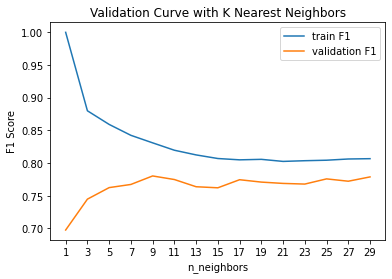

In [ ]:
train_scores, valid_scores = validation_curve(KNeighborsClassifier(metric='manhattan'), X_train, y_train, param_name="n_neighbors", param_range=n_neighbors, scoring='f1', cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

print(valid_scores_mean)
plt.title("Validation Curve with K Nearest Neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("F1 Score")
plt.xticks(np.arange(1,30,step=2))
plt.plot(n_neighbors, train_scores_mean, label="train F1")
plt.plot(n_neighbors, valid_scores_mean, label="validation F1")

plt.legend()
plt.show()

[0.05576638 0.06740893 0.04458933 0.07482727 0.05896097 0.07369611
 0.06995413 0.07587622 0.07256825 0.07287657 0.07842958 0.07813558
 0.06931441 0.07901671 0.06663155]


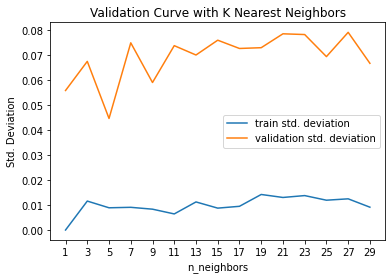

In [ ]:
train_scores, valid_scores = validation_curve(KNeighborsClassifier(metric='manhattan'), X_train, y_train, param_name="n_neighbors", param_range=n_neighbors, scoring='f1', cv=10)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

print(valid_scores_std)
plt.title("Validation Curve with K Nearest Neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Std. Deviation")
plt.xticks(np.arange(1,30,step=2))
plt.plot(n_neighbors, train_scores_std, label="train std. deviation")
plt.plot(n_neighbors, valid_scores_std, label="validation std. deviation")

plt.legend()
plt.show()

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=17, metric='manhattan')
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

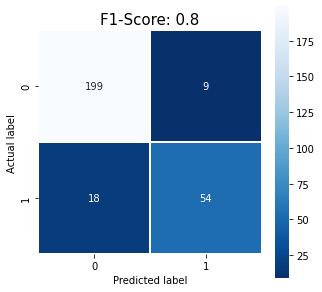

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'F1-Score: {0}'.format(round(f1_score(y_test, y_pred),3))
plt.title(all_sample_title, size = 15);

In [ ]:
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,"\n" "FP: ",fp,"\n" "TN: ", tn,"\n" "FN: ",fn)
print()
print(classification_report(y_test, y_pred))

TP:  54 
FP:  9 
TN:  199 
FN:  18

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       208
           1       0.86      0.75      0.80        72

    accuracy                           0.90       280
   macro avg       0.89      0.85      0.87       280
weighted avg       0.90      0.90      0.90       280



# Random Forest

In [ ]:
X = featuresRFC.iloc[:,0:20]
y = featuresRFC['Playoffs']

In [ ]:
featuresRFC.iloc[:,0:20].head()

,ERA+,RA/G,1Run,R/G,OPS+,SV,H_P,BB_P,BB,DefEff,Rtot,HR,#a-tA-S,IP,SOS,PA,HR_P,SF,2B,Under500
0,0.173913,0.477612,0.559387,0.339394,0.44,0.302094,0.622353,0.429180,0.465585,0.602041,0.391473,0.380797,0.45,0.678982,0.545455,0.594126,0.418914,0.358281,0.151402,0.402703
1,0.637681,0.000000,0.390805,0.133333,0.32,0.194577,0.181001,0.154861,0.410213,1.000000,0.841085,0.213898,0.65,0.697641,0.454545,0.356231,0.123964,0.398932,0.191710,0.389189
2,0.231884,0.300995,0.641762,0.363636,0.56,0.265422,0.464920,0.429180,0.440077,0.581633,0.372093,0.303797,0.75,0.710241,0.454545,0.523644,0.189573,0.538171,0.361411,0.385135
3,0.275362,0.161692,0.618774,0.000000,0.36,0.100396,0.159225,0.688073,0.021753,0.867347,0.569767,0.126699,0.40,0.680184,0.454545,0.279588,0.142855,0.124424,0.078143,0.271622
4,0.594203,0.208955,0.392720,0.442424,0.46,0.390013,0.482468,0.204570,0.540521,0.663265,0.441860,0.335165,0.60,0.752545,0.363636,0.566620,0.233241,0.443268,0.242631,0.528378


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

[0.78104987 0.76440496 0.76440496]


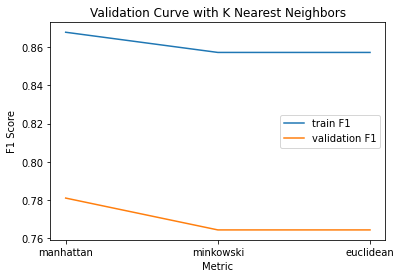

In [ ]:
train_scores, valid_scores = validation_curve(KNeighborsClassifier(), X_train, y_train, param_name="metric", param_range=KNNmetrics, scoring='f1', cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

print(valid_scores_mean)
plt.title("Validation Curve with K Nearest Neighbors")
plt.xlabel("Metric")
plt.ylabel("F1 Score")
plt.plot(KNNmetrics, train_scores_mean, label="train F1")
plt.plot(KNNmetrics, valid_scores_mean, label="validation F1")

plt.legend()
plt.show()

[0.70247957 0.76189353 0.78104987 0.79696148 0.79882727 0.80171604
 0.80249457 0.79970061 0.80186779 0.80898437 0.79323209 0.79174391
 0.7946962  0.78748753 0.78633519]


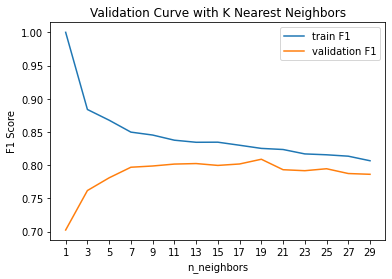

In [ ]:
train_scores, valid_scores = validation_curve(KNeighborsClassifier(metric='manhattan'), X_train, y_train, param_name="n_neighbors", param_range=n_neighbors, scoring='f1', cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

print(valid_scores_mean)
plt.title("Validation Curve with K Nearest Neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("F1 Score")
plt.xticks(np.arange(1,30,step=2))
plt.plot(n_neighbors, train_scores_mean, label="train F1")
plt.plot(n_neighbors, valid_scores_mean, label="validation F1")

plt.legend()
plt.show()

[0.06528712 0.06773952 0.04283011 0.03886243 0.04388834 0.04788952
 0.04536385 0.05683875 0.05890677 0.04638513 0.05476298 0.04655408
 0.06103022 0.07300808 0.06896755]


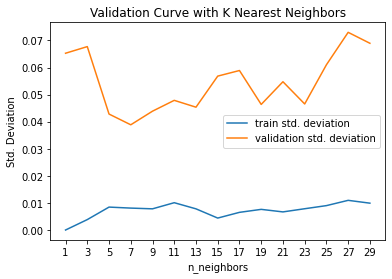

In [ ]:
train_scores, valid_scores = validation_curve(KNeighborsClassifier(metric='manhattan'), X_train, y_train, param_name="n_neighbors", param_range=n_neighbors, scoring='f1', cv=10)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

print(valid_scores_std)
plt.title("Validation Curve with K Nearest Neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Std. Deviation")
plt.xticks(np.arange(1,30,step=2))
plt.plot(n_neighbors, train_scores_std, label="train std. deviation")
plt.plot(n_neighbors, valid_scores_std, label="validation std. deviation")

plt.legend()
plt.show()

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=19, metric='manhattan')
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

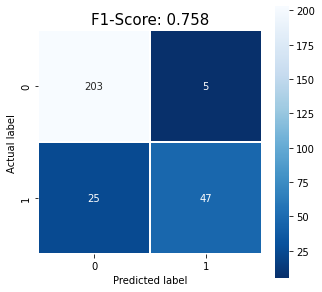

In [ ]:
plt.figure(figsize=(5,5))
group_names = ['TN', 'FP', 'FN', 'TP']
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'F1-Score: {0}'.format(round(f1_score(y_test, y_pred),3))
plt.title(all_sample_title, size = 15);

In [ ]:
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,"\n" "FP: ",fp,"\n" "TN: ", tn,"\n" "FN: ",fn)
print()
print(classification_report(y_test, y_pred))

TP:  47 
FP:  5 
TN:  203 
FN:  25

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       208
           1       0.90      0.65      0.76        72

    accuracy                           0.89       280
   macro avg       0.90      0.81      0.84       280
weighted avg       0.89      0.89      0.89       280

